In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-datasets/daily-minimum-temperatures-in-me.csv
/kaggle/input/time-series-datasets/sales-of-shampoo-over-a-three-ye.csv
/kaggle/input/time-series-datasets/Electric_Production.csv
/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv


In [2]:
df = pd.read_csv("/kaggle/input/time-series-datasets/Electric_Production.csv")

In [3]:
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df["DATE"]=pd.to_datetime(df["DATE"])

In [6]:
df.index=df["DATE"]

In [7]:
df

,DATE,IPG2211A2N
DATE,,
1985-01-01,1985-01-01,72.5052
1985-02-01,1985-02-01,70.6720
1985-03-01,1985-03-01,62.4502
1985-04-01,1985-04-01,57.4714
1985-05-01,1985-05-01,55.3151
...,...,...
2017-09-01,2017-09-01,98.6154
2017-10-01,2017-10-01,93.6137
2017-11-01,2017-11-01,97.3359


In [8]:
df.drop("DATE",axis=1,inplace=True)

In [9]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


<Axes: xlabel='DATE'>

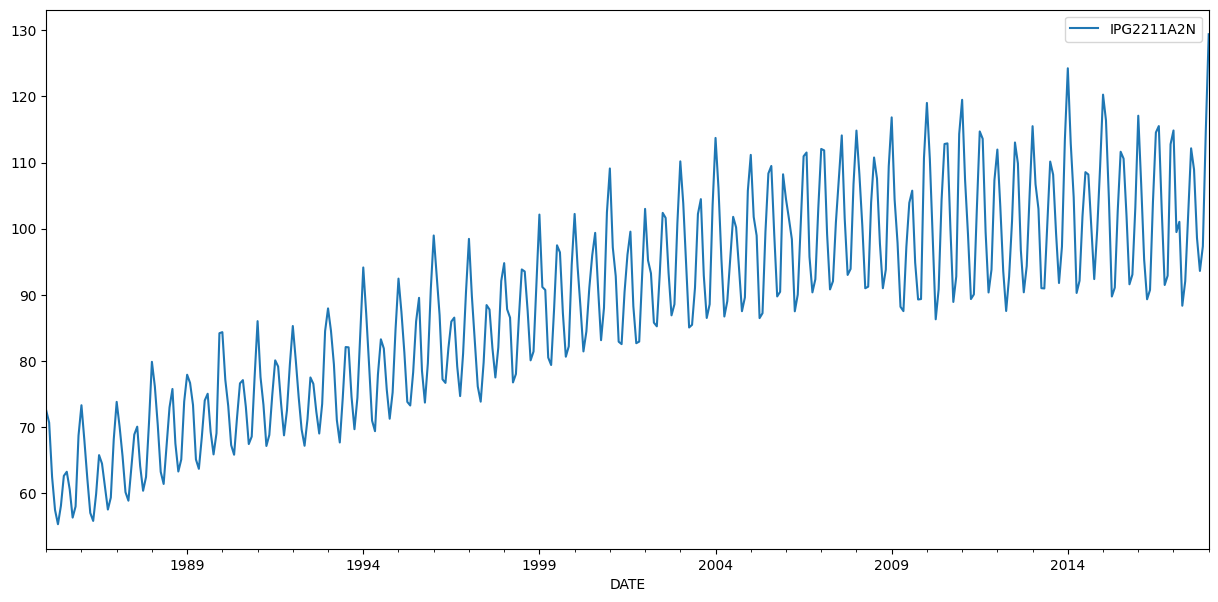

In [10]:
import matplotlib.pyplot as plt
df.plot(figsize=(15,7))

In [11]:
df1=pd.read_csv("/kaggle/input/time-series-datasets/daily-minimum-temperatures-in-me.csv",parse_dates=["Date"],index_col="Date")

In [12]:
df1

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


In [13]:
df1.index[0]

Timestamp('1981-01-01 00:00:00')

In [14]:
df1.plot()

TypeError: no numeric data to plot

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Daily minimum temperatures  3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB


In [17]:
df1.columns

Index(['Daily minimum temperatures'], dtype='object')

In [19]:
df1["Daily minimum temperatures"]=pd.to_numeric(df1["Daily minimum temperatures"],errors="coerce")

In [20]:
df1.isnull().sum()

Daily minimum temperatures    3
dtype: int64

In [28]:
df1.value_counts()

Daily minimum temperatures
11.0                          51
10.0                          51
13.0                          48
10.5                          44
9.0                           44
                              ..
1.8                            1
21.1                           1
20.9                           1
19.6                           1
26.3                           1
Name: count, Length: 227, dtype: int64

<Axes: xlabel='Date'>

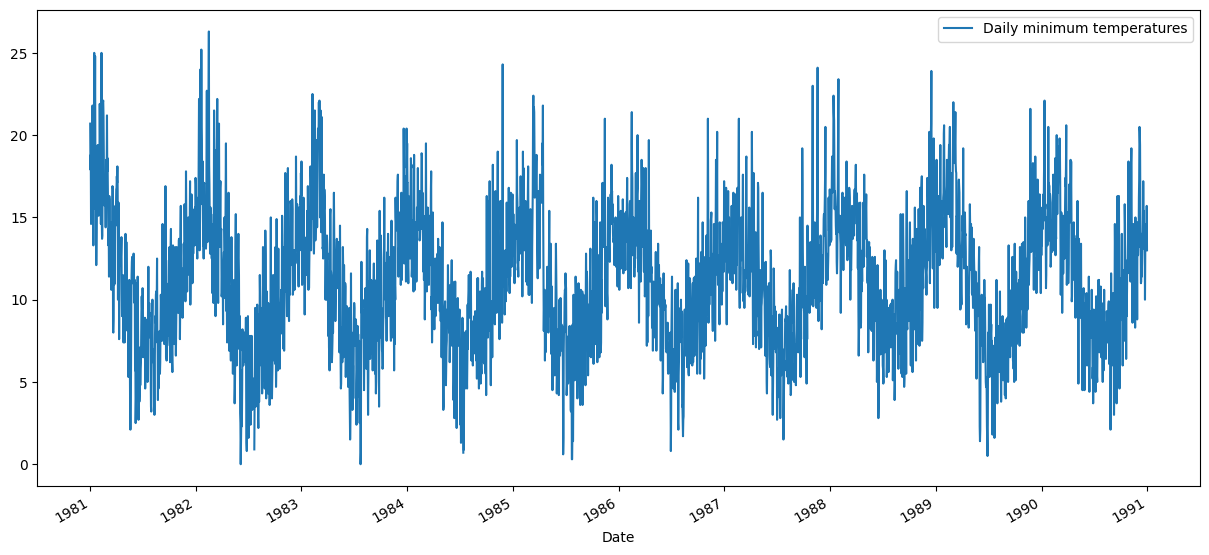

In [22]:
df1.plot(figsize=(15,7))